# Clustering & PCA Assignment   

Problem Statement:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.



# Reading and Understanding the Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Importing all datasets
country_df = pd.read_csv("Country-Data.csv")


In [3]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Let's convert imports,exports and health spending from percentage values to actual values of their GDP per capita
country_df['exports']=country_df['exports']*country_df['gdpp']/100
country_df['imports']=country_df['imports']*country_df['gdpp']/100
country_df['health']=country_df['health']*country_df['gdpp']/100

In [5]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
 #Let's pop the country column
data=country_df.pop("country")
data.head()


0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [7]:
#Shape of Dataset
country_df.shape

(167, 9)

In [8]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Data Preparation

In [9]:
#Data info
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 11.8 KB


In [10]:
# missing values
round(100*(country_df.isnull().sum())/len(country_df), 2)

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There is no null value in the data set

##### Outliers checking 

In [11]:
# Checking for outliers in the continuous variables
country_df = country_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [12]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [13]:
#Let's do scaling so that PCA can be applied on the dataset.
scaler = StandardScaler()
X = country_df.copy()

In [14]:
#store the scaling in a variable
country_df1 = scaler.fit_transform(X)

In [15]:
#check maximum value here
country_df1.max()

9.839814177922182

In [16]:
#array
country_df1[:5,:5]

array([[ 1.29153238, -0.4110113 , -0.56503989, -0.4322755 , -0.8082454 ],
       [-0.5389489 , -0.35019096, -0.43921769, -0.31367739, -0.3753689 ],
       [-0.27283273, -0.31852577, -0.48482608, -0.35372048, -0.22084447],
       [ 2.00780766, -0.29137452, -0.53236319, -0.34595254, -0.58504345],
       [-0.69563412, -0.10433146, -0.17877054,  0.04073499,  0.10173177]])

### Let's Apply PCA on Dataset

In [17]:
#library
from sklearn.decomposition import PCA

In [18]:
#Importing PCA module
pca = PCA(random_state=42)

In [19]:
pca.fit(country_df1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
# List of PCA componenets
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [21]:
#PCA variance ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

<BarContainer object of 9 artists>

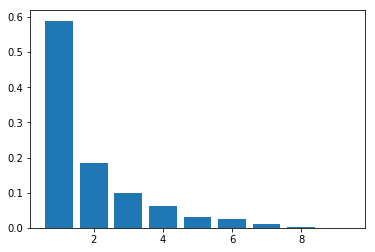

In [22]:
# PCA variance Bar Graph
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

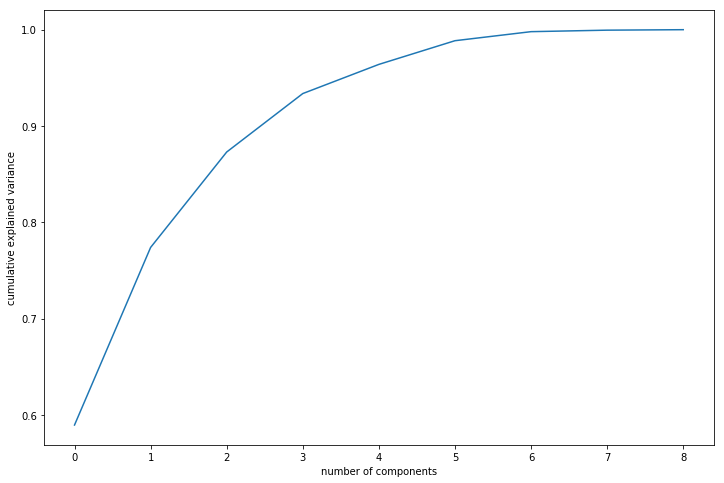

In [23]:
#Scree Plot
#Plotting the Cumulative variance against number of components


%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

 Above 90% of the data clearly explained the First three compoents of the PCA .Let's use for clustering

In [24]:
#Let's consider three components
pc2 = PCA(n_components=5, random_state=42)

In [25]:
newdata = pc2.fit_transform(country_df1)

In [26]:
#Let's transform our original data into three components
newdata.shape

(167, 5)

In [27]:
#Creating a transpose so that the each column is properly arranged
newdata=np.transpose(newdata)
newdata

array([[-2.63557499e+00, -2.42055643e-02, -4.59557398e-01,
        -2.72263028e+00,  6.48597043e-01,  3.54221548e-02,
        -3.34554724e-01,  3.18152480e+00,  3.81685715e+00,
        -4.67994708e-01,  1.49896170e+00,  1.47088772e+00,
        -1.01516655e+00,  8.44165717e-01, -1.50192243e-02,
         3.96165209e+00, -4.03885263e-01, -2.36396201e+00,
        -7.16047998e-01, -1.01877707e+00,  2.50743177e-01,
        -1.12948907e+00,  1.65169993e-01,  2.69707911e+00,
         2.79292646e-01, -2.75148004e+00, -2.76243995e+00,
        -1.17965396e+00, -2.43892330e+00,  3.39523415e+00,
        -5.24475038e-01, -3.23694559e+00, -3.18539522e+00,
         6.90650603e-01, -1.30696482e-01, -1.55448767e-02,
        -1.94913029e+00, -3.11493019e+00, -2.04734314e+00,
         4.29282147e-01, -2.57219502e+00,  8.45147825e-01,
         2.31333607e+00,  1.67399330e+00,  4.37790595e+00,
        -3.68925556e-01, -3.04457221e-01, -8.37748859e-01,
        -3.38219520e-01, -1.05254165e+00, -1.94833895e+0

In [28]:
#let's create the matrix using three components
df_final=pd.DataFrame({'PC1':newdata[0],'PC2':newdata[1],'PC3':newdata[2],'PC4':newdata[3],'PC5':newdata[4]})

df_final.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530
1,-0.024206,-1.429892,-0.014123,0.450645,-0.125821
2,-0.459557,-0.675495,0.959355,0.218456,-0.113275
3,-2.722630,2.172332,0.600215,-0.433978,0.005433
4,0.648597,-1.023437,-0.257430,0.289201,0.072694


In [29]:
#Let's add back the country to the given principal components
df_final = pd.concat([df_final, data], axis=1)
df_final.head()



,PC1,PC2,PC3,PC4,PC5,country
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530,Afghanistan
1,-0.024206,-1.429892,-0.014123,0.450645,-0.125821,Albania
2,-0.459557,-0.675495,0.959355,0.218456,-0.113275,Algeria
3,-2.722630,2.172332,0.600215,-0.433978,0.005433,Angola
4,0.648597,-1.023437,-0.257430,0.289201,0.072694,Antigua and Barbuda


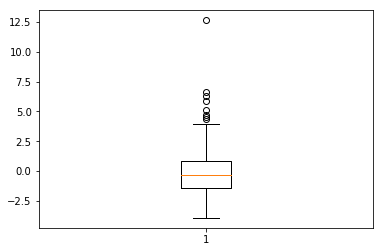

In [30]:
#Let's do the outliers analysis before perform clustering
#PC1 outlier
plt.boxplot(df_final.PC1)
Q1=df_final.PC1.quantile(0.05)
Q3=df_final.PC1.quantile(0.95)
IQR=Q3-Q1
df_final=df_final[(df_final.PC1>=Q1)&(df_final.PC1<=Q3)]

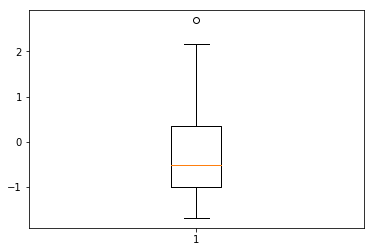

In [31]:
#PC2 Outliers
plt.boxplot(df_final.PC2)
Q1=df_final.PC2.quantile(0.05)
Q3=df_final.PC2.quantile(0.95)
IQR=Q3-Q1
df_final=df_final[(df_final.PC2>=Q1)&(df_final.PC2<=Q3)]

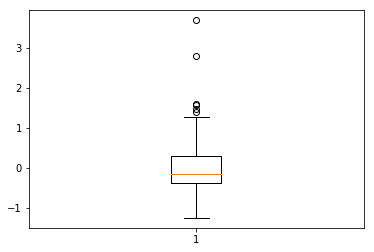

In [32]:
#PCA3 Outlier
plt.boxplot(df_final.PC3)
Q1=df_final.PC3.quantile(0.05)
Q3=df_final.PC3.quantile(0.95)
IQR=Q3-Q1
df_final=df_final[(df_final.PC3>=Q1)&(df_final.PC3<=Q3)]

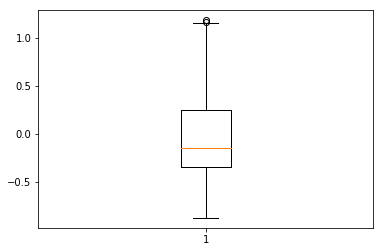

In [33]:
#PCA4 Outlier
plt.boxplot(df_final.PC3)
Q1=df_final.PC4.quantile(0.05)
Q3=df_final.PC4.quantile(0.95)
IQR=Q3-Q1
df_final=df_final[(df_final.PC4>=Q1)&(df_final.PC4<=Q3)]

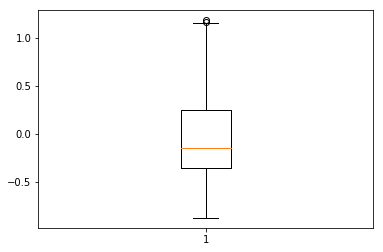

In [34]:
#PCA3 Outlier
plt.boxplot(df_final.PC3)
Q1=df_final.PC5.quantile(0.05)
Q3=df_final.PC5.quantile(0.95)
IQR=Q3-Q1
df_final=df_final[(df_final.PC5>=Q1)&(df_final.PC5<=Q3)]

# Visualising the Data

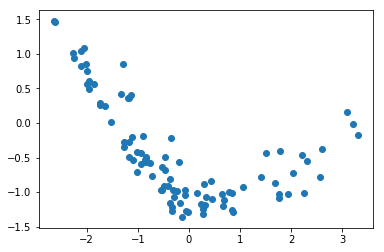

In [35]:
#Let's visualise the resultant PCs
plt.scatter(x='PC1',y='PC2',data=df_final)

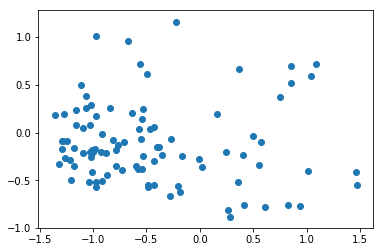

In [36]:
#Let's visualise PC2 Vs PC3
plt.scatter(x='PC2',y='PC3',data=df_final)

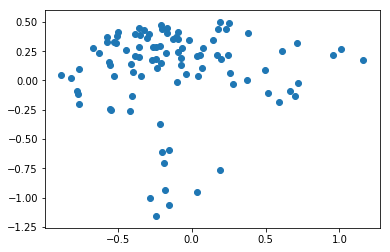

In [37]:
#Let's visualise PC3 Vs PC4
plt.scatter(x='PC3',y='PC4',data=df_final)

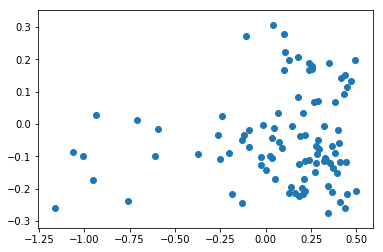

In [38]:
#Let's visualise PC4 Vs PC5
plt.scatter(x='PC4',y='PC5',data=df_final)

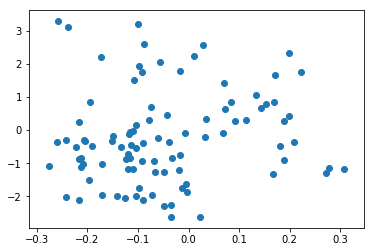

In [39]:
#Let's visualise PC5 Vs PC1
plt.scatter(x='PC5',y='PC1',data=df_final)

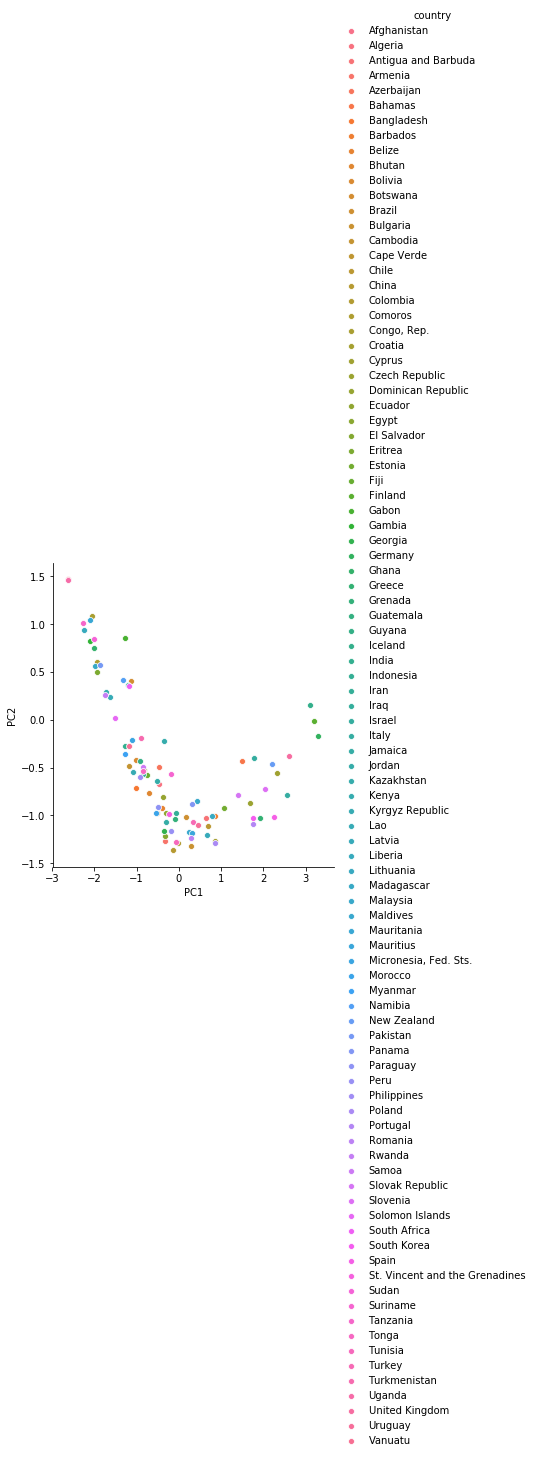

In [40]:
#PairPlot between PC1 and PC2 
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "country", size=5)

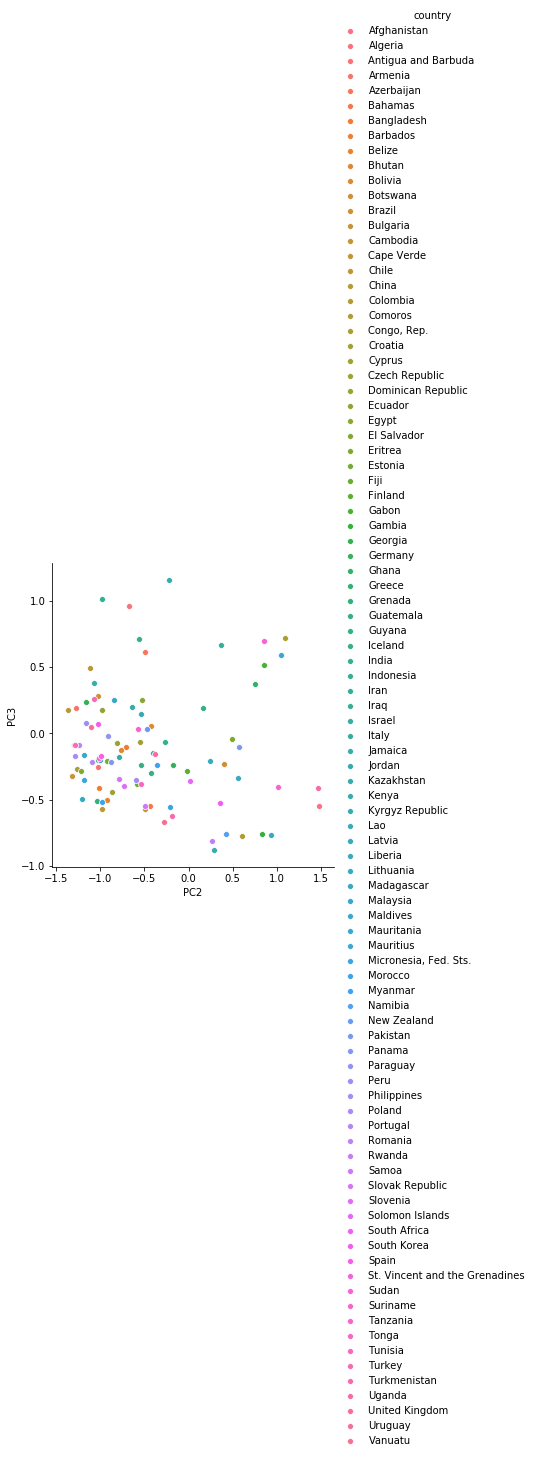

In [41]:
#pairplot between PC2 and PC3 
sns.pairplot(data=df_final, x_vars=["PC2"], y_vars=["PC3"], hue = "country", size=5)

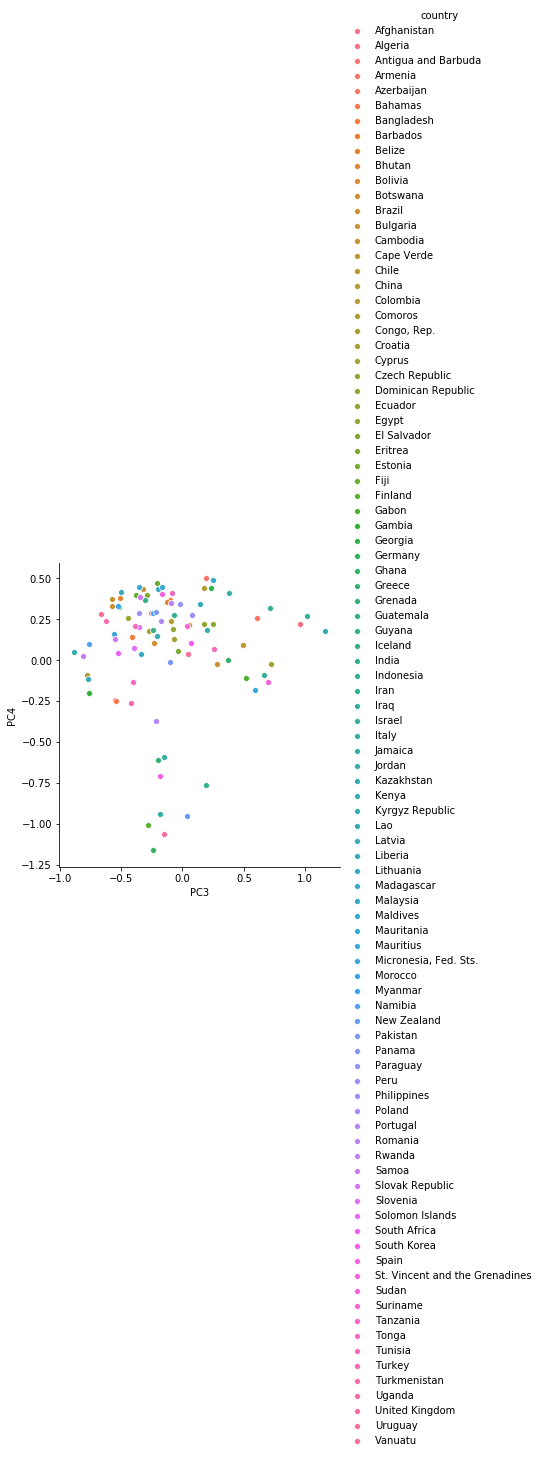

In [42]:
#pairplot between PC3 and PC4 
sns.pairplot(data=df_final, x_vars=["PC3"], y_vars=["PC4"], hue = "country", size=5)

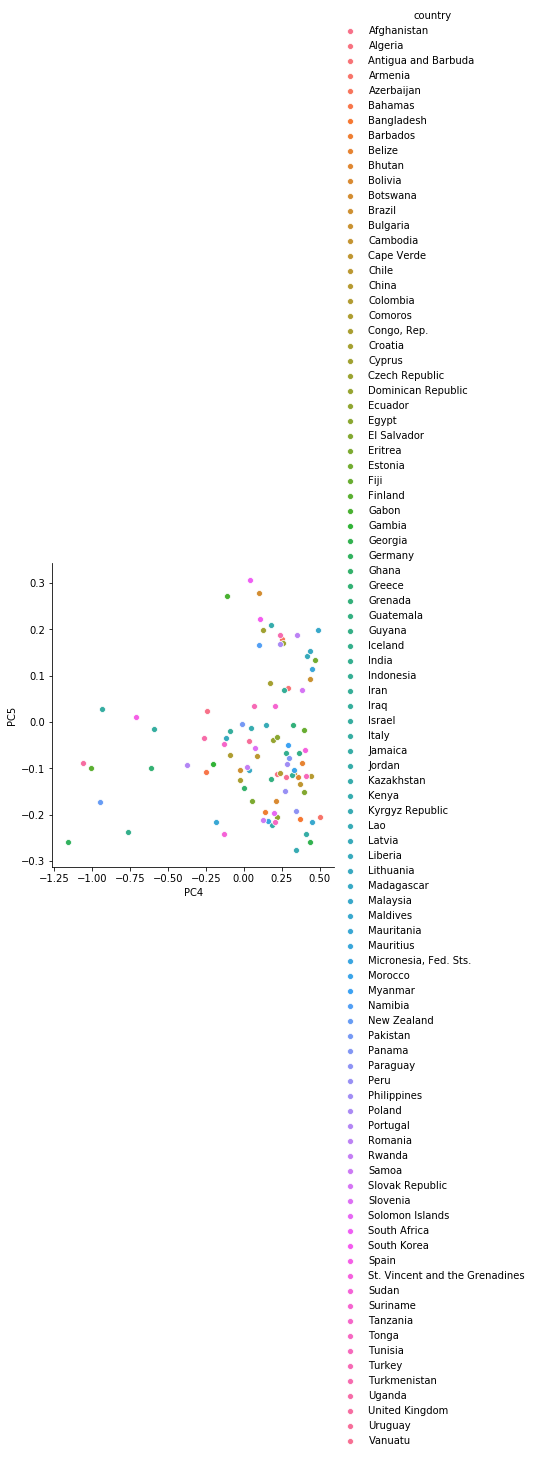

In [43]:
#pairplot between PC4 and PC5
sns.pairplot(data=df_final, x_vars=["PC4"], y_vars=["PC5"], hue = "country", size=5)

## Clustering

In [44]:
#Let's check the hopkins statistics to ensure that the data is good for clustering
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
#hopkins measure
hopkins(df_final.drop(['country'],axis=1))

0.8035999762257644

In [46]:
#Hence 0.84 is good hopkins score to perform the clustering
# Now for perfroming clustering, we need to again drop the ID column, Let's drop it
df_final1 = df_final.drop(['country'],axis=1).copy()


In [47]:
# Check the shape of the resultant data
df_final1.shape

(95, 5)

## K-Mean clustering

#### Look at the silhouette score plot and choose the optimal number of cluster

In [48]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_final1)
    sse_.append([k, silhouette_score(df_final1, kmeans.labels_)])

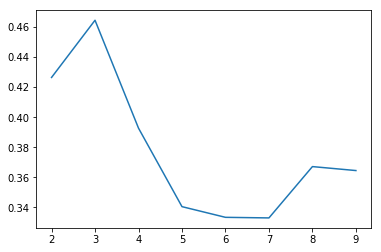

In [49]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

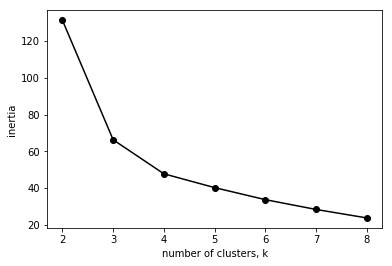

In [50]:
ks = [2, 3, 4, 5, 6, 7, 8]
ssd = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_final1)
    
    # Append the inertia to the list of ssd
    ssd.append(model.inertia_)
# let's use the elbow curve to choose the cluster    
plt.plot(ks, ssd, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [51]:
# final model with k=4
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_final1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
#Kmean labels
kmeans.labels_

array([1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0,
       0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 2, 0, 1])

In [53]:
# assign the label
df_final2=df_final1
df_final2['cluster_id'] = kmeans.labels_
df_final2.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530,1
2,-0.459557,-0.675495,0.959355,0.218456,-0.113275,0
4,0.648597,-1.023437,-0.257430,0.289201,0.072694,0
6,-0.334555,-1.271889,0.190564,0.500247,-0.205703,0
9,-0.467995,-0.492682,0.609900,0.254612,0.179938,0


In [54]:
#Let's count the numnber of cluster
df_final2['cluster_id'].value_counts()

0    51
1    28
2    16
Name: cluster_id, dtype: int64

Analyse the clusters and identify the ones which are in dire need of aid. we can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

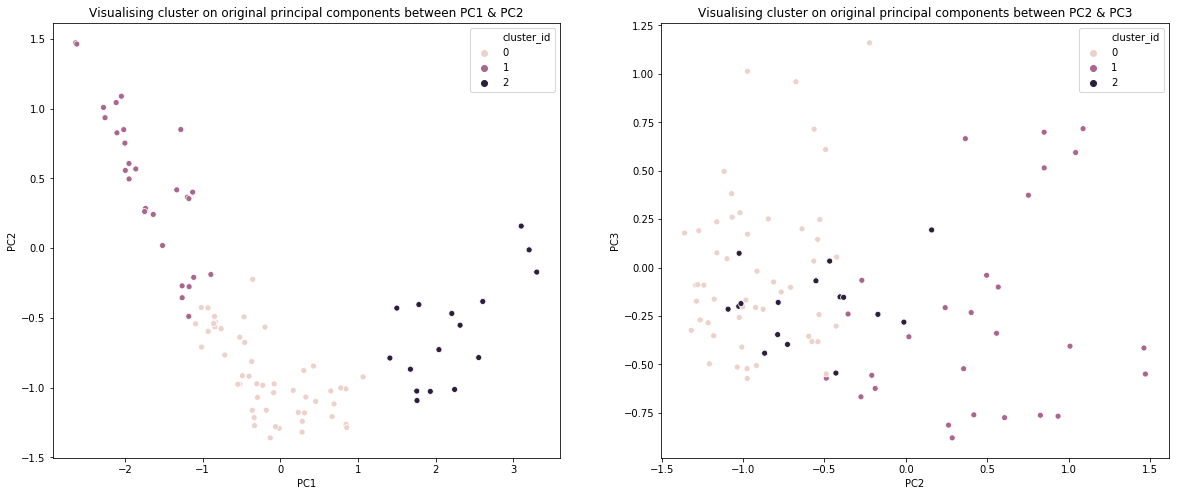

In [55]:
# plot
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Visualising cluster on original principal components between PC1 & PC2')
sns.scatterplot(x='PC1', y='PC2',hue='cluster_id',legend='full',data=df_final2)

plt.subplot(1,2,2)
plt.title('Visualising cluster on original principal components between PC2 & PC3')
sns.scatterplot(x='PC2', y='PC3',hue='cluster_id',data=df_final2)




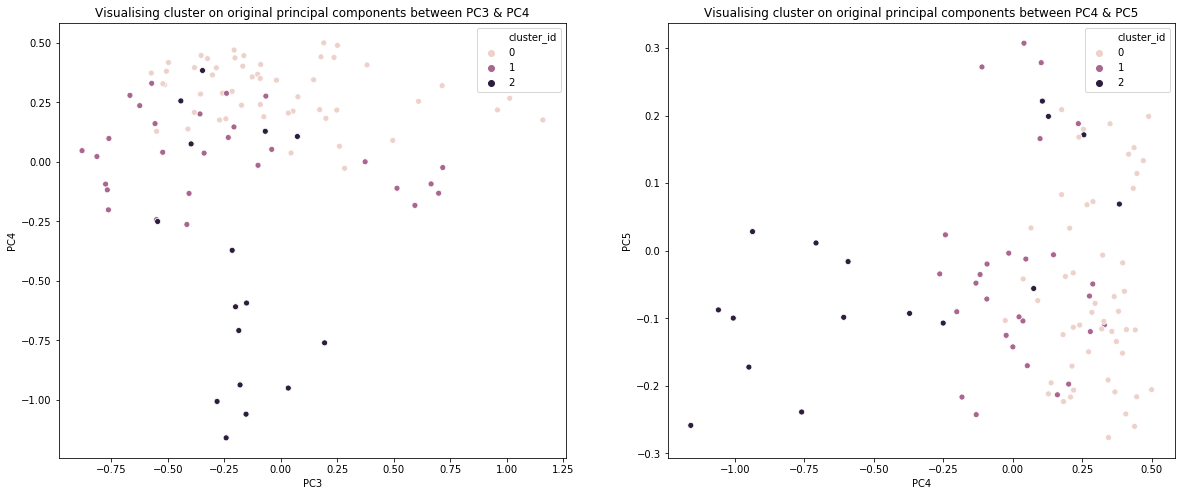

In [56]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Visualising cluster on original principal components between PC3 & PC4')
sns.scatterplot(x='PC3', y='PC4',hue='cluster_id',data=df_final2)

plt.subplot(1,2,2)
plt.title('Visualising cluster on original principal components between PC4 & PC5')
sns.scatterplot(x='PC4', y='PC5',hue='cluster_id',data=df_final2)


# Cluster Profiling

In [57]:
#Analysed now using the original variables to identify the countries which we finally want to select.
df_final3=pd.concat([country_df,data], axis=1)
df_final3=pd.concat([df_final3,df_final2], axis=1)
df_final3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,PC1,PC2,PC3,PC4,PC5,cluster_id
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,-2.635575,1.472267,-0.549489,-0.242326,0.023530,1.0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Albania,NaN,NaN,NaN,NaN,NaN,NaN
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,-0.459557,-0.675495,0.959355,0.218456,-0.113275,0.0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Angola,NaN,NaN,NaN,NaN,NaN,NaN
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,0.648597,-1.023437,-0.257430,0.289201,0.072694,0.0


In [58]:
# Let's drop PCs from the data
df_final4=df_final3.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
df_final4.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_id
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,1.0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Albania,NaN
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,0.0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Angola,NaN
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,0.0


So we have performed the clustering using the PCs and have now allocated the cluster_id back to each of the datapoints

# Analysis of the clusters


In [59]:
# Let's profile the cluster by taking the mean of various attributes
clu_1 = pd.DataFrame(df_final4.groupby(["cluster_id"]).child_mort.mean())
clu_2= pd.DataFrame(df_final4.groupby(["cluster_id"]).exports.mean())
clu_3 = pd.DataFrame(df_final4.groupby(["cluster_id"]).health.mean())
clu_4 = pd.DataFrame(df_final4.groupby(["cluster_id"]).imports.mean())
clu_5 = pd.DataFrame(df_final4.groupby(["cluster_id"]).income.mean())
clu_6 = pd.DataFrame(df_final4.groupby(["cluster_id"]).inflation.mean())
clu_7 = pd.DataFrame(df_final4.groupby(["cluster_id"]).life_expec.mean())
clu_8 = pd.DataFrame(df_final4.groupby(["cluster_id"]).total_fer.mean())
clu_9 = pd.DataFrame(df_final4.groupby(["cluster_id"]).gdpp.mean())


In [60]:
# Let's concat the resultant with the Cluster ID columns
df_final5 = pd.concat([pd.Series([0,1]),clu_1,clu_2,clu_3,clu_4,clu_5,clu_6,clu_7,clu_8,clu_9], axis=1)

In [61]:
# Let's add column name to it
df_final5.columns = ["cluster_id","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df_final5

,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0.0,0.0,21.192157,2671.815686,412.207757,2895.481647,11828.039216,5.764137,73.411765,2.349412,6382.313725
1.0,1.0,64.910714,933.287740,137.466750,911.775253,4620.357143,8.951071,62.778571,4.167143,2199.892857
2.0,NaN,4.781250,12269.237500,2799.860625,12331.012500,31943.750000,1.143063,79.675000,1.706250,30606.250000



We observe that Child mortality, Income and GDP per capita are good predictors for the development of a country. 
On cross-checking with the original Principal components that we drew, these 3 components had good scores.
Hence we can say that they are a good source of information for the Clustering Process.Let's visualise the clusters along these

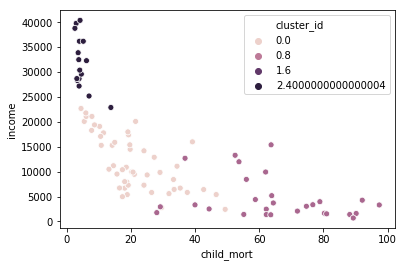

In [62]:
sns.scatterplot(x='child_mort',y='income',hue='cluster_id',data=df_final4)

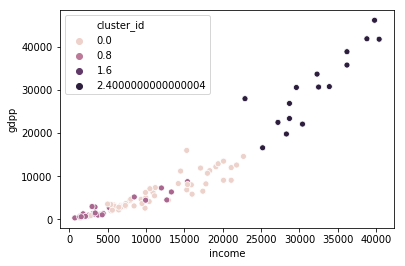

In [63]:
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',data=df_final4)

In [64]:
#let's take those cluster which have low attributes
df_final4[df_final4['cluster_id']==0]


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_id
2,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,Algeria,0.0
4,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,Antigua and Barbuda,0.0
6,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,Armenia,0.0
9,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,Azerbaijan,0.0
12,49.4,121.28,26.6816,165.244,2440,7.140,70.4,2.33,758,Bangladesh,0.0
13,14.2,6320.00,1275.2000,7792.000,15300,0.321,76.7,1.78,16000,Barbados,0.0
16,18.8,2525.88,225.6800,2495.500,7880,1.140,71.4,2.71,4340,Belize,0.0
18,42.7,926.50,113.3600,1541.260,6420,5.990,72.1,2.38,2180,Bhutan,0.0
19,46.6,815.76,95.8320,679.140,5410,8.780,71.6,3.20,1980,Bolivia,0.0
22,19.8,1198.40,1009.1200,1321.600,14500,8.410,74.2,1.80,11200,Brazil,0.0


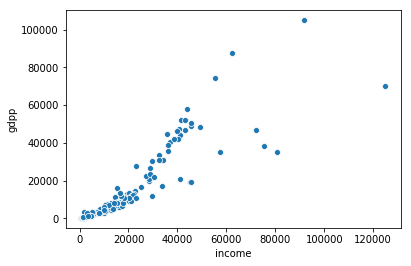

In [65]:

#K-means has done a satisfactory job here. Let's take a different approach and make the clusters only on the basis of these
sns.scatterplot(x='income',y='gdpp',data=df_final4)

# Hierarchical Clustering


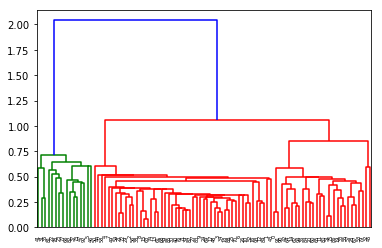

In [66]:
# single linkage
mergings = linkage(df_final1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

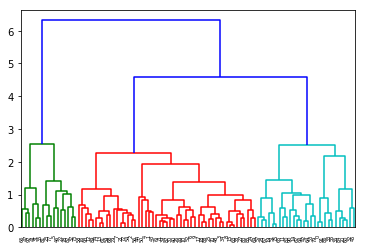

In [67]:
# complete linkage
mergings = linkage(df_final1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [68]:
#cluster labels
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       2, 2, 1, 1, 1, 1, 0, 1, 1, 3, 0, 0, 1, 3, 0, 2, 1, 1, 1, 3, 0, 1,
       1, 0, 2, 3, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       3, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 3, 1, 0])

In [69]:
# assign cluster labels
df_final1['cluster_labels'] = cluster_labels
df_final1.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id,cluster_labels
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530,1,0
2,-0.459557,-0.675495,0.959355,0.218456,-0.113275,0,1
4,0.648597,-1.023437,-0.257430,0.289201,0.072694,0,1
6,-0.334555,-1.271889,0.190564,0.500247,-0.205703,0,1
9,-0.467995,-0.492682,0.609900,0.254612,0.179938,0,1


## Visualise the cluster

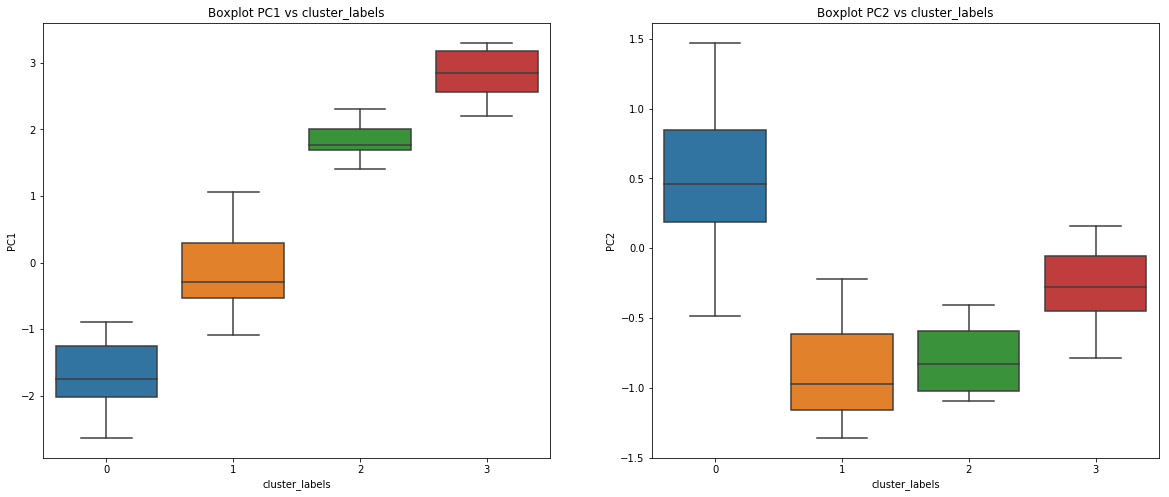

In [70]:
# Analysing the components with cluster_labels
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Boxplot PC1 vs cluster_labels')
sns.boxplot(x='cluster_labels', y='PC1', data=df_final1)

plt.subplot(1,2,2)
plt.title('Boxplot PC2 vs cluster_labels')
sns.boxplot(x='cluster_labels', y='PC2',data=df_final1)



plt.show()

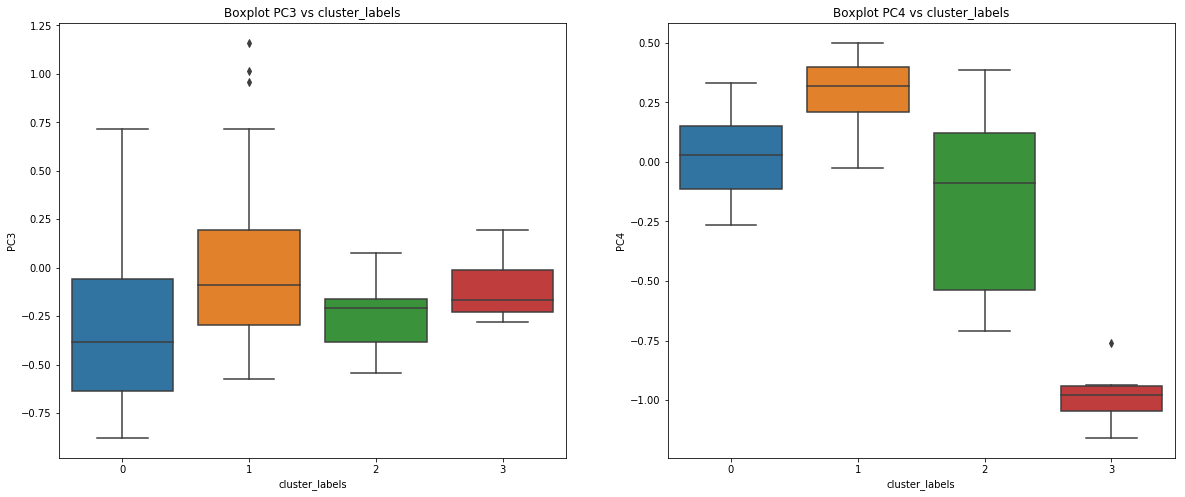

In [71]:

# Analysing the components with cluster_labels
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Boxplot PC3 vs cluster_labels')
sns.boxplot(x='cluster_labels', y='PC3', data=df_final1)

plt.subplot(1,2,2)
plt.title('Boxplot PC4 vs cluster_labels')
sns.boxplot(x='cluster_labels', y='PC4',data=df_final1)



plt.show()

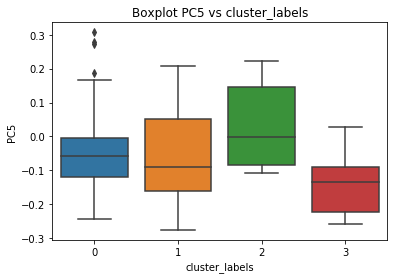

In [72]:
#Analysing Boxplot


plt.title('Boxplot PC5 vs cluster_labels')
sns.boxplot(x='cluster_labels', y='PC5', data=df_final1)






## Clustering profiling

In [73]:
#Analysed now using the original variables to identify the countries which we finally want to select.

df_final_her=pd.concat([df_final3,df_final2], axis=1)

df_final_her=df_final_her[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','cluster_labels']]
df_final_her.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,1145.20,1987.740,267.8950,9930,4.49,76.3,1.65,4090,NaN
2,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1.0
3,Angola,119.0,2199.19,1514.370,100.6050,5900,22.40,60.1,6.16,3530,NaN
4,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,1.0


In [74]:
#counts of cluster_labels
df_final_her['cluster_labels'].value_counts()

1.0    51
0.0    28
2.0    10
3.0     6
Name: cluster_labels, dtype: int64

In [75]:
#Cluster 3 doesn't have enough amount of clusters. Let's see if other clusters are good or not.
df_final_her[df_final_her['cluster_labels']==2]



,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_labels
10,Bahamas,13.8,9800.0,12236.0,2209.20,22900,-0.393,73.8,1.86,28000,2.0
42,Cyprus,3.6,15461.6,17710.0,1838.76,33900,2.010,79.9,1.42,30800,2.0
43,Czech Republic,3.4,13068.0,12454.2,1560.24,28300,-1.430,77.5,1.51,19800,2.0
60,Greece,3.9,5944.9,8258.3,2770.70,28700,0.673,80.4,1.48,26900,2.0
74,Israel,4.6,10710.0,10067.4,2334.78,29600,1.770,81.4,3.03,30600,2.0
122,Portugal,3.9,6727.5,8415.0,2475.00,27200,0.643,79.8,1.39,22500,2.0
134,Slovak Republic,7.0,12665.8,12914.8,1459.14,25200,0.485,75.5,1.43,16600,2.0
135,Slovenia,3.2,15046.2,14718.6,2201.94,28700,-0.987,79.5,1.57,23400,2.0
138,South Korea,4.1,10917.4,10210.2,1531.53,30400,3.160,80.1,1.23,22100,2.0
139,Spain,3.8,7828.5,8227.6,2928.78,32500,0.160,81.9,1.37,30700,2.0


In [76]:
#this would be the cluster that we need to focus on
df_final_her[df_final_her['cluster_labels']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_labels
53,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,3.0
58,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,3.0
68,Iceland,2.6,22374.6,18142.7,3938.60,38800,5.470,82.0,2.20,41900,3.0
75,Italy,4.0,9021.6,9737.6,3411.74,36200,0.319,81.7,1.46,35800,3.0
111,New Zealand,6.2,10211.1,9436.0,3403.70,32300,3.730,80.9,2.17,33700,3.0
158,United Kingdom,5.2,10969.8,11981.2,3749.96,36200,1.570,80.3,1.92,38900,3.0


In [77]:
#some countries haven't been properly clustered 
df_final_her[df_final_her['cluster_labels']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30000,248.297000,41.9174,1610,9.44,56.2,5.82,553,0.0
21,Botswana,52.5,2768.60000,3257.550000,527.0500,13300,8.92,57.1,2.88,6350,0.0
27,Cambodia,44.4,425.22600,467.670000,44.6448,2520,3.12,66.1,2.88,786,0.0
36,Comoros,88.2,126.88500,397.573000,34.6819,1410,3.87,65.9,4.75,769,0.0
38,"Congo, Rep.",63.9,2331.74000,1498.780000,67.4040,5190,20.70,60.4,4.95,2740,0.0
50,Eritrea,55.2,23.08780,112.306000,12.8212,1420,11.60,61.7,4.61,482,0.0
55,Gabon,63.7,5048.75000,1653.750000,306.2500,15400,16.60,62.9,4.08,8750,0.0
56,Gambia,80.3,133.75600,239.974000,31.9778,1660,4.30,65.5,5.71,562,0.0
59,Ghana,74.7,386.45000,601.290000,68.3820,3060,16.60,62.2,4.27,1310,0.0
69,India,58.8,305.10000,365.850000,54.6750,4410,8.98,66.2,2.60,1350,0.0


visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well. You can also choose other types of plots like boxplots, etc.

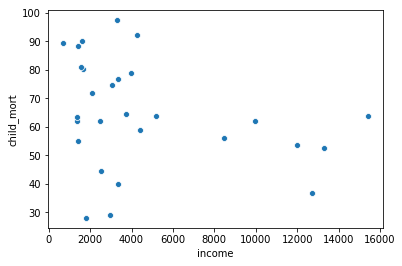

In [78]:
 
#Visualisation between two income and child_mort
data_her=df_final_her[df_final_her['cluster_labels']==0]
sns.scatterplot(x='income',y='child_mort',data=data_her)

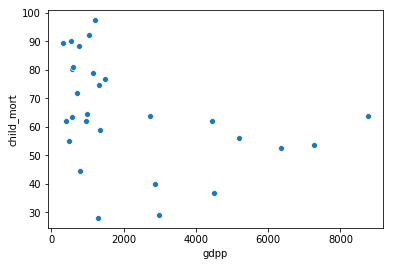

In [79]:
#visualization between gdpp and child_mort
data_her=df_final_her[df_final_her['cluster_labels']==0]
sns.scatterplot(x='gdpp',y='child_mort',data=data_her)

## Finding the observations that belong to certain cluster
Let's say my problem statement here is to just the find the countries which need to focus for aids.
So we can choose those cluster means as cut offs and find the final list of countries.

In [80]:
#original data after clustering

df_final3=pd.concat([country_df,data], axis=1)
df_final3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda


In [81]:
#The limit that we got from the clustering process was 2199.
#let's filter the complete dataset with 2199 as the cut-off limit for gdpp.
#Let's use the concept of binning
df_final3=df_final3[df_final3['gdpp']<=2199]

df_final3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,Afghanistan
12,49.4,121.280,26.6816,165.244,2440,7.140,70.4,2.33,758,Bangladesh
17,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,Benin
18,42.7,926.500,113.3600,1541.260,6420,5.990,72.1,2.38,2180,Bhutan
19,46.6,815.760,95.8320,679.140,5410,8.780,71.6,3.20,1980,Bolivia


In [82]:
#final countries len
len(df_final3)

51

In [83]:
#df_final3=df_final3[df_final3['child_mort']>=4.9]
#df_final4=df_final3[df_final3['income']<4620]
#len(df_final4)


In [84]:
#final list of countries
#major focus should be given those countries that are given below
df_final3

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553,Afghanistan
12,49.4,121.28000,26.6816,165.244000,2440,7.140,70.4,2.33,758,Bangladesh
17,111.0,180.40400,31.0780,281.976000,1820,0.885,61.8,5.36,758,Benin
18,42.7,926.50000,113.3600,1541.260000,6420,5.990,72.1,2.38,2180,Bhutan
19,46.6,815.76000,95.8320,679.140000,5410,8.780,71.6,3.20,1980,Bolivia
25,116.0,110.40000,38.7550,170.200000,1430,6.810,57.9,5.87,575,Burkina Faso
26,93.6,20.60520,26.7960,90.552000,764,12.300,57.7,6.26,231,Burundi
27,44.4,425.22600,44.6448,467.670000,2520,3.120,66.1,2.88,786,Cambodia
28,108.0,290.82000,67.2030,353.700000,2660,1.910,57.3,5.11,1310,Cameroon
31,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446,Central African Republic


In [85]:
# 5 countries which are in direst need of aid from the analysis work that we perform above.
 
df_final3=df_final3[['country']]
df_final3.head(5)

,country
0,Afghanistan
12,Bangladesh
17,Benin
18,Bhutan
19,Bolivia


After visualisation we saw k-means clustering and Hierarchical don't showing identical insights.Its totally depends on the components and the final number of cluster choosen.The upper limit that we got from the clustering process was 2199 according to this we filter all the countries and got final list of countries which are in direst need of aid from the analysis that we perform these are those countries which are need to focus .